In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/joseph.riva/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/joseph.riva/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [3]:
def decode_sequence(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    #print(reverse_word_index)
    decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in sequence])
    return decoded_review

Example of one of the reviews

In [4]:
decode_sequence(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
import numpy as np

In [6]:
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape = (10_000, )))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model = get_model()
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5850 - accuracy: 0.6870 - val_loss: 0.3603 - val_accuracy: 0.8751
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2984 - accuracy: 0.9074 - val_loss: 0.3021 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2128 - accuracy: 0.9298 - val_loss: 0.2928 - val_accuracy: 0.8795
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9500 - val_loss: 0.2783 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1387 - accuracy: 0.9570 - val_loss: 0.3041 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1062 - accuracy: 0.9709 - val_loss: 0.3149 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0861 - accuracy: 0.9777 - val_loss: 0.3163 - val_accuracy: 0.8828
Epoch 8/20
30

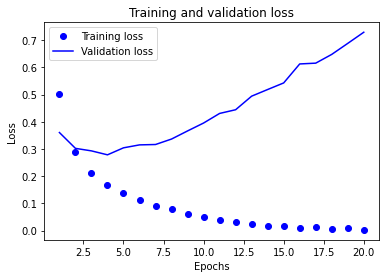

In [12]:
import matplotlib.pyplot as plt
def plot_loss(history):
    history_dict = history.history
    loss_vals = history_dict['loss']
    val_loss_vals = history_dict['val_loss']

    epochs = range(1, len(loss_vals)+1)

    plt.plot(epochs, loss_vals, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_vals, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_loss(history)

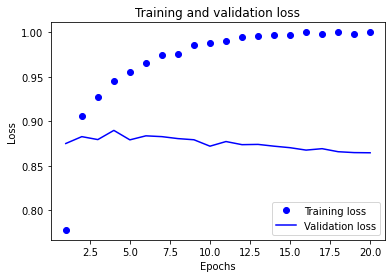

In [14]:
def plot_acc(history):
    history_dict = history.history
    acc_vals = history_dict['accuracy']
    val_acc_vals = history_dict['val_accuracy']
    
    epochs = range(1, len(acc_vals) + 1)
    
    plt.plot(epochs, acc_vals, 'bo', label='Training loss')
    plt.plot(epochs, val_acc_vals, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plt.clf()
plot_acc(history)

Epoch 1/4
30/30 [==============================] - 1s 26ms/step - loss: 0.5916 - accuracy: 0.6985 - val_loss: 0.3858 - val_accuracy: 0.8760
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3232 - accuracy: 0.9023 - val_loss: 0.3122 - val_accuracy: 0.8865
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2312 - accuracy: 0.9315 - val_loss: 0.2813 - val_accuracy: 0.8905
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.1845 - accuracy: 0.9442 - val_loss: 0.2753 - val_accuracy: 0.8893


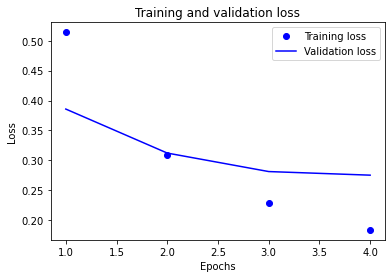

In [15]:
# retraining with 4 epochs to avoid overfitting
model = get_model()
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))
plot_loss(history)

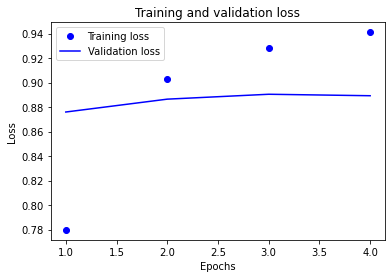

In [16]:
plt.clf()
plot_acc(history)

In [17]:
# eval on test data
results = model.evaluate(x_test, y_test)
loss, acc = results
print(f'loss: {loss}, acc: {acc}')

782/782 [==============================] - 1s 863us/step - loss: 0.2940 - accuracy: 0.8834
loss: 0.29396846890449524, acc: 0.8833600282669067


In [18]:
# model output as a confidence percentage for predicting output
model.predict(x_test)

array([[0.2616368 ],
       [0.99149835],
       [0.819481  ],
       ...,
       [0.118049  ],
       [0.16011626],
       [0.5988146 ]], dtype=float32)